In [1]:
import pandas as pd
import numpy as py

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Amazon_Music\single_genre_artists.csv")
print(df)

                     id_songs          name_song  popularity_songs  \
0      0IA0Hju8CAgYfV1hwhidBH            La Java                 0   
1      1b8HZQCqcqwbzlA1jRTp6E           En Douce                 0   
2      5d5gQxHwYovxR5pqETOIAa      J'en Ai Marre                 0   
3      1EO65UEEPfy7CR0NK2sDxy   Ils n'ont pas ca                 0   
4      6a58gXSgqbIsXUhVZ6ZJqe          La belote                 0   
...                       ...                ...               ...   
95832  44r4zta6P9flkhKaVnbsvG             Freaks                70   
95833  0MmaEacabpK8Yp3Mdeo5uY                下雨天                50   
95834  1dKxf4Ht2SsKLyXfSDJAgy   The Cutest Puppy                67   
95835  0SjsIzJkZfDU7wlcdklEFR  John Brown's Song                66   
95836  5rgu12WBIHQtvej2MdHSH0                云与海                50   

       duration_ms  explicit              id_artists release_date  \
0           161427         0  4AxgXfD7ISvJSTObqm4aIE         1922   
1           223440   

In [4]:
print(df.shape)

(95837, 23)


In [5]:
print(df.columns)

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')


In [6]:
print(df.dtypes)

id_songs               object
name_song              object
popularity_songs        int64
duration_ms             int64
explicit                int64
id_artists             object
release_date           object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
followers             float64
genres                 object
name_artists           object
popularity_artists      int64
dtype: object


In [7]:
print(df.isnull().sum())

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64


In [8]:
print(df.duplicated().sum())

0


In [9]:
df = df.drop(columns=['track_name', 'artist_name', 'track_id'], errors='ignore')
print(df.shape)

(95837, 23)


In [10]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

Index(['popularity_songs', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'followers', 'popularity_artists'],
      dtype='object')


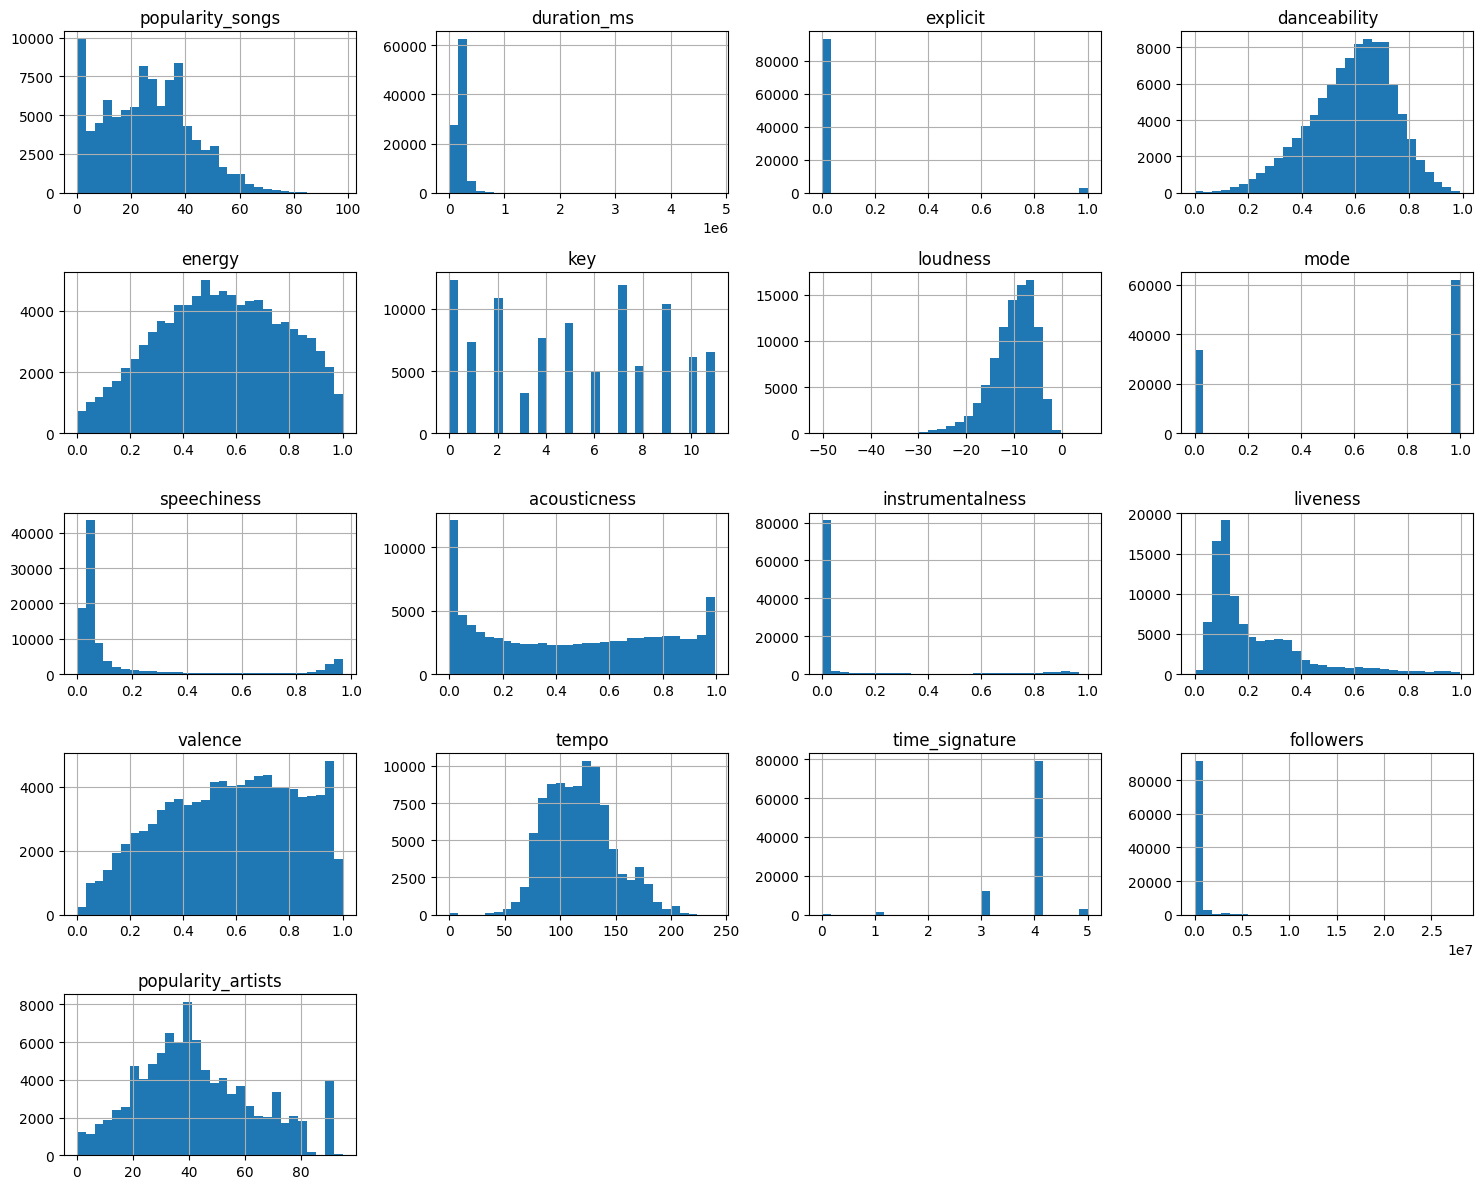

In [11]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

df[numeric_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

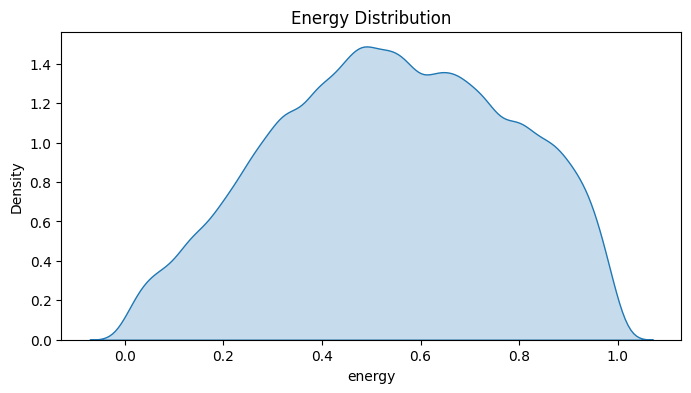

In [12]:
plt.figure(figsize=(8,4))
sns.kdeplot(df['energy'], fill=True)
plt.title('Energy Distribution')
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])


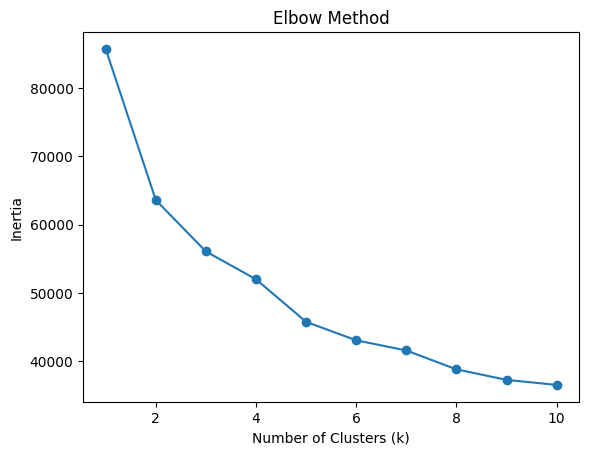

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df_scaled.select_dtypes(include=['int64','float64']).values

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [16]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(X)

df_scaled.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,cluster
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0.0,0.032345,0.0,4AxgXfD7ISvJSTObqm4aIE,1922,0.568113,0.183984,0.363636,...,0.000016,0.325978,0.654,0.554751,0.6,0.000181,['vintage chanson'],Mistinguett,0.231579,2
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0.0,0.045281,0.0,4AxgXfD7ISvJSTObqm4aIE,1922,0.430878,0.179984,0.909091,...,0.000000,0.128385,0.431,0.327041,0.6,0.000181,['vintage chanson'],Mistinguett,0.231579,2
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0.0,0.042116,0.0,4AxgXfD7ISvJSTObqm4aIE,1922,0.515641,0.205984,0.000000,...,0.000000,0.419258,0.481,0.293628,0.8,0.000181,['vintage chanson'],Mistinguett,0.231579,2
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0.0,0.032451,0.0,4AxgXfD7ISvJSTObqm4aIE,1924,0.682139,0.466989,0.818182,...,0.000000,0.219659,0.726,0.540941,0.8,0.000181,['vintage chanson'],Mistinguett,0.231579,0
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0.0,0.033711,0.0,4AxgXfD7ISvJSTObqm4aIE,1924,0.655903,0.297986,0.818182,...,0.000000,0.374122,0.844,0.316582,0.8,0.000181,['vintage chanson'],Mistinguett,0.231579,2


In [17]:
features = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms"
]

X = df[features]

X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,161427
1,0.427,0.180,-15.375,0.0670,0.989,0.000000,0.128,0.431,78.459,223440
2,0.511,0.206,-15.514,0.0592,0.995,0.000000,0.418,0.481,70.443,208267
3,0.676,0.467,-12.393,0.1650,0.991,0.000000,0.219,0.726,129.775,161933
4,0.650,0.298,-13.806,0.1380,0.991,0.000000,0.373,0.844,75.950,167973


In [18]:
from sklearn.preprocessing import MinMaxScaler

features = [
    'danceability', 'energy', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 
    'valence', 'tempo', 'duration_ms'
]

X = df[features]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Scaling completed. Shape:", X_scaled.shape)

Scaling completed. Shape: (95837, 10)


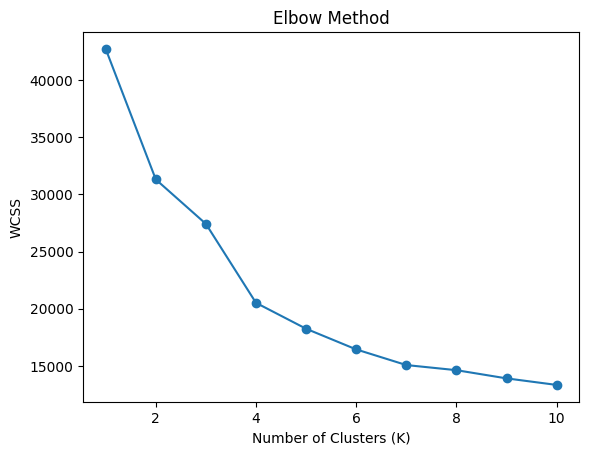

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)   # inertia_ = WCSS

plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [20]:
best_k = 5

kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,cluster
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22,2
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22,2
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22,2
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22,2
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22,2


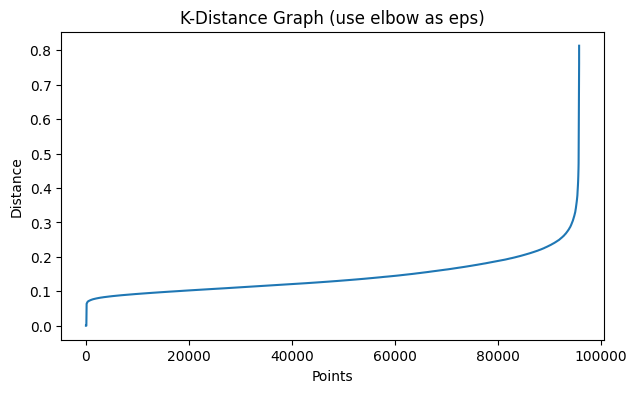

dbscan_cluster
 0    95372
-1      465
Name: count, dtype: int64

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 9])

plt.figure(figsize=(7,4))
plt.plot(distances)
plt.title("K-Distance Graph (use elbow as eps)")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

dbscan = DBSCAN(
    eps=0.30,
    min_samples=10
)

db_labels = dbscan.fit_predict(X_scaled)

df["dbscan_cluster"] = db_labels

df["dbscan_cluster"].value_counts()

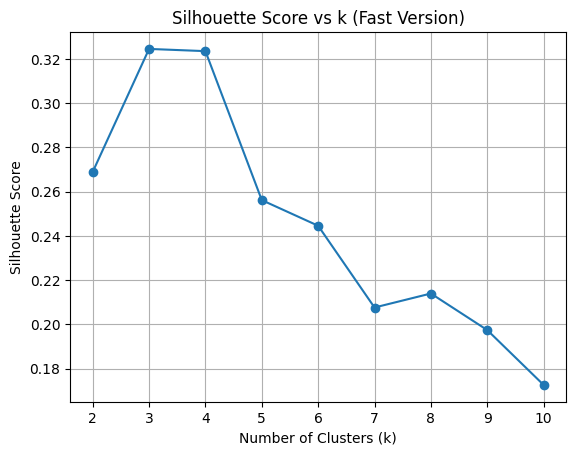

Best k = 3


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,cluster,dbscan_cluster
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22,2,0
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22,2,0
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22,2,0
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22,2,0
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22,2,0


In [22]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

k_range = range(2, 11)
sil_scores = []

sample_size = 5000  
if X_scaled.shape[0] > sample_size:
    idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
    X_sample = X_scaled[idx]
else:
    X_sample = X_scaled

for k in k_range:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=512)
    labels_full = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_sample, labels_full[idx])  
    sil_scores.append(sil)

plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k (Fast Version)")
plt.grid()
plt.show()

best_k = k_range[sil_scores.index(max(sil_scores))]
print("Best k =", best_k)

final_kmeans = MiniBatchKMeans(n_clusters=best_k, random_state=42, batch_size=512)
df['cluster'] = final_kmeans.fit_predict(X_scaled)

df.head()

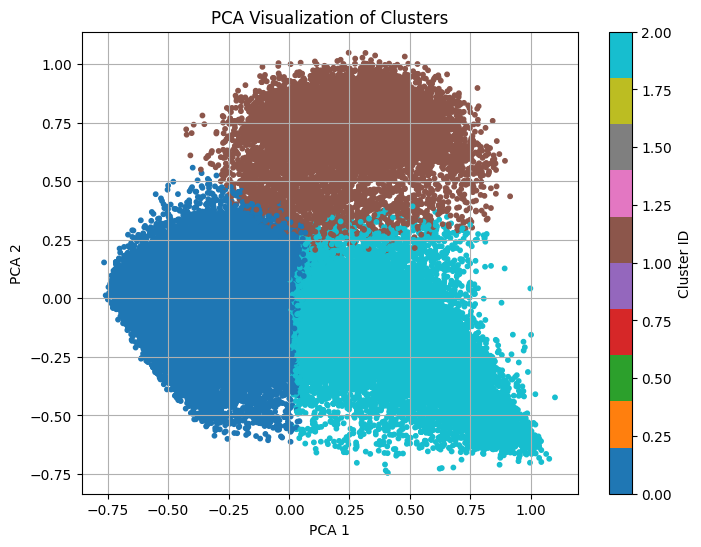

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'], cmap='tab10', s=10)
plt.colorbar(label="Cluster ID")
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

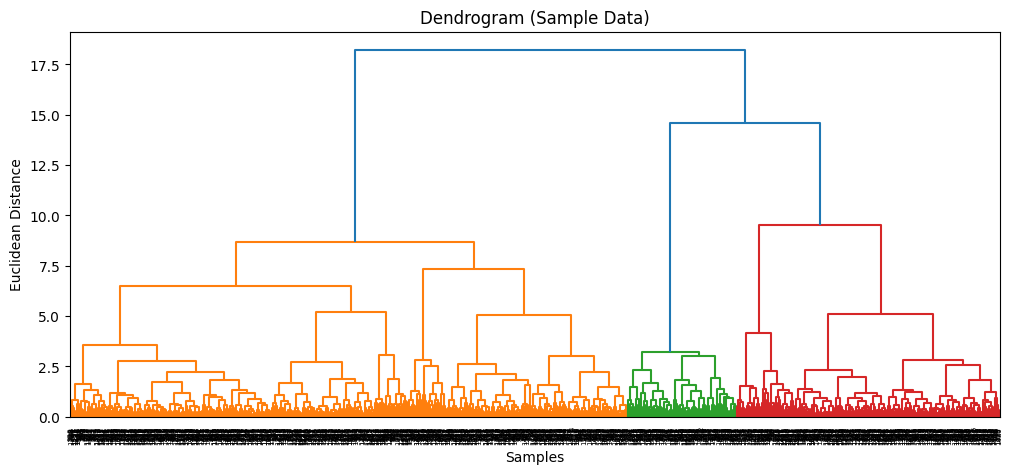

In [24]:
import scipy.cluster.hierarchy as sch
import numpy as np
import matplotlib.pyplot as plt

sample_size = 1500
if X_scaled.shape[0] > sample_size:
    idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
    X_dendo = X_scaled[idx]
else:
    X_dendo = X_scaled

plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(X_dendo, method='ward'))
plt.title("Dendrogram (Sample Data)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

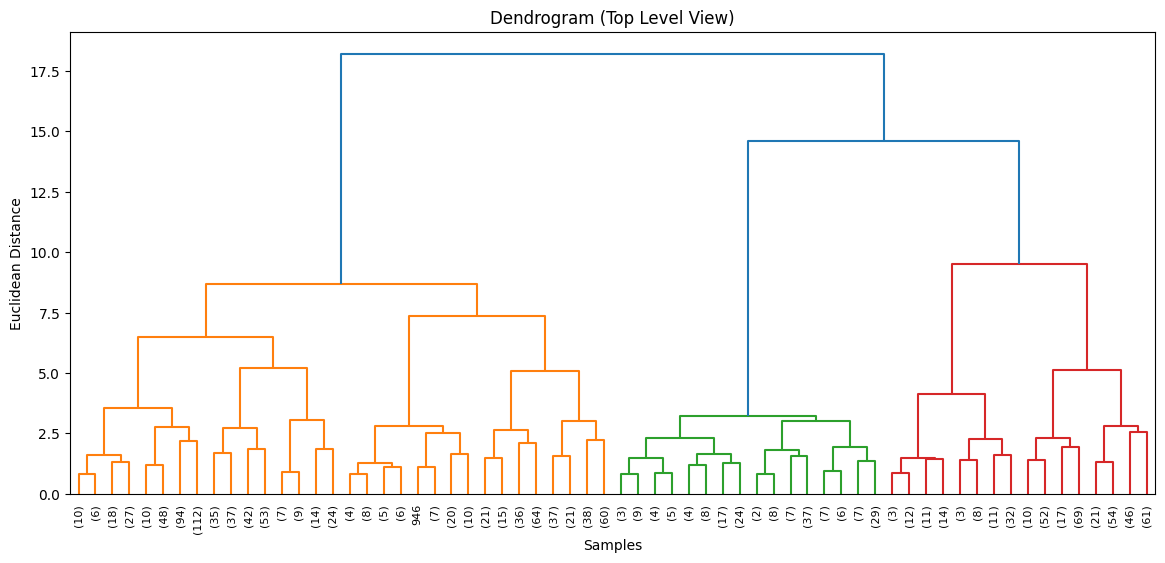

In [25]:
plt.figure(figsize=(14, 6))
sch.dendrogram(
    sch.linkage(X_dendo, method='ward'),
    truncate_mode='level',   
    p=5,                     
    leaf_font_size=8
)
plt.title("Dendrogram (Top Level View)")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

In [29]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

labels = kmeans.labels_

silhouette = silhouette_score(X_scaled, labels)
db_index = davies_bouldin_score(X_scaled, labels)
inertia = kmeans.inertia_

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("Inertia:", inertia)

Silhouette Score: 0.17110362532698367
Davies-Bouldin Index: 1.6608594488588024
Inertia: 13579.533683364916


In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

df_clusters = df.copy()
df_clusters['cluster'] = label

selected_features = ['danceability', 'energy', 'acousticness', 'tempo',
                     'loudness', 'valence', 'speechiness', 'instrumentalness']

cluster_profile = df_clusters.groupby('cluster')[selected_features].mean()
print("\n=== Cluster Profile (Mean Feature Values) ===\n")
print(cluster_profile)

def interpret_cluster(row):
    profile = []
    
    if row['danceability'] > df[selected_features].mean()['danceability']:
        profile.append("High Danceability")
    if row['energy'] > df[selected_features].mean()['energy']:
        profile.append("High Energy")
    if row['acousticness'] > df[selected_features].mean()['acousticness']:
        profile.append("High Acousticness")
    if row['instrumentalness'] > df[selected_features].mean()['instrumentalness']:
        profile.append("High Instrumentalness")
    if row['valence'] > df[selected_features].mean()['valence']:
        profile.append("Happy/Major Tone")
    if row['tempo'] > df[selected_features].mean()['tempo']:
        profile.append("Fast Tempo")
    
    if row['energy'] < df[selected_features].mean()['energy']:
        profile.append("Low Energy")
    if row['acousticness'] < df[selected_features].mean()['acousticness']:
        profile.append("Low Acousticness")
    
    return ", ".join(profile)

print("\n=== Cluster Interpretation ===\n")
for cluster_id, row in cluster_profile.iterrows():
    print(f"Cluster {cluster_id}: {interpret_cluster(row)}")



=== Cluster Profile (Mean Feature Values) ===

                                        danceability    energy  acousticness  \
cluster                                                                        
<function label at 0x0000024C607460C0>      0.586853  0.541083      0.458989   

                                            tempo   loudness   valence  \
cluster                                                                  
<function label at 0x0000024C607460C0>  117.53987 -10.157862  0.574281   

                                        speechiness  instrumentalness  
cluster                                                                
<function label at 0x0000024C607460C0>     0.168832          0.082145  

=== Cluster Interpretation ===

Cluster <function label at 0x0000024C607460C0>: High Danceability, High Acousticness


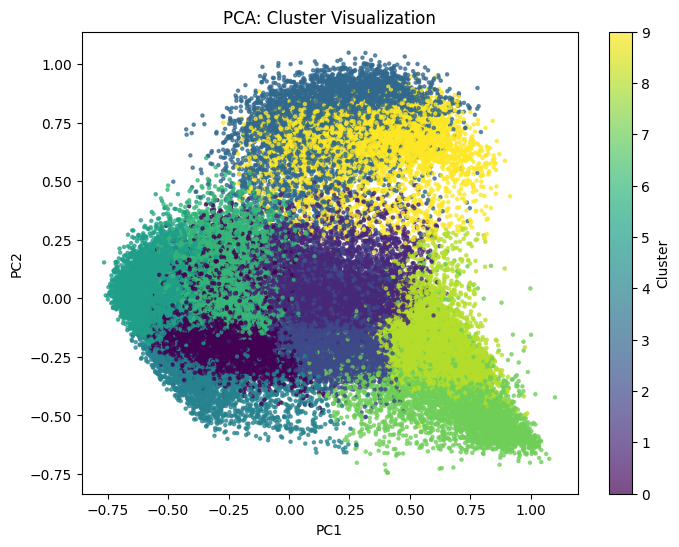

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels_full, s=5, alpha=0.7)
plt.title("PCA: Cluster Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()

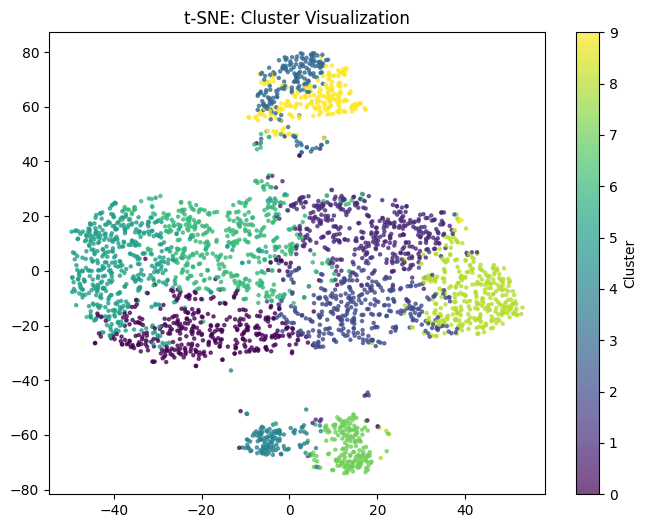

In [33]:
from sklearn.manifold import TSNE
import numpy as np

idx = np.random.choice(len(X_scaled), 3000, replace=False)
X_small = X_scaled[idx]
labels_small = labels_full[idx]

tsne = TSNE(n_components=2, perplexity=40, learning_rate=200)
tsne_data = tsne.fit_transform(X_small)

plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=labels_small, s=5, alpha=0.7)
plt.title("t-SNE: Cluster Visualization")
plt.colorbar(label="Cluster")
plt.show()

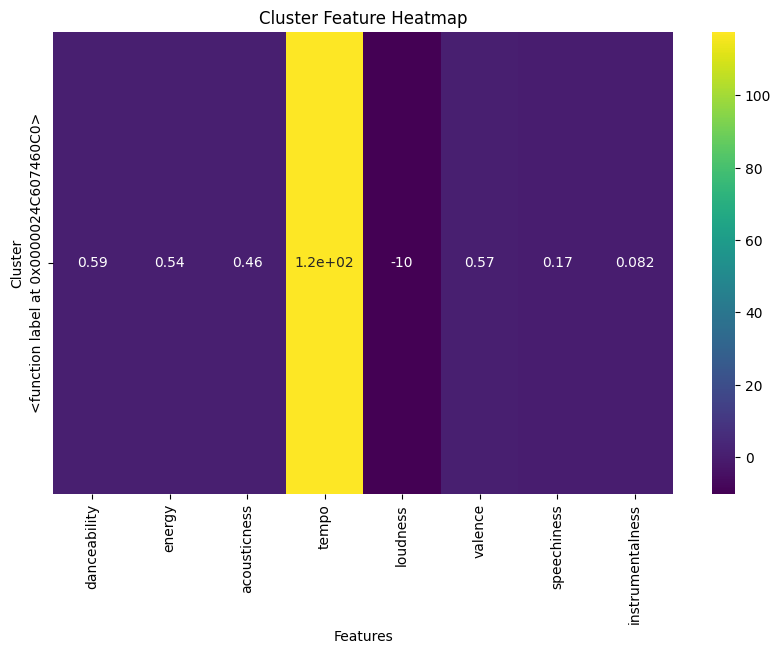

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap="viridis")
plt.title("Cluster Feature Heatmap")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()

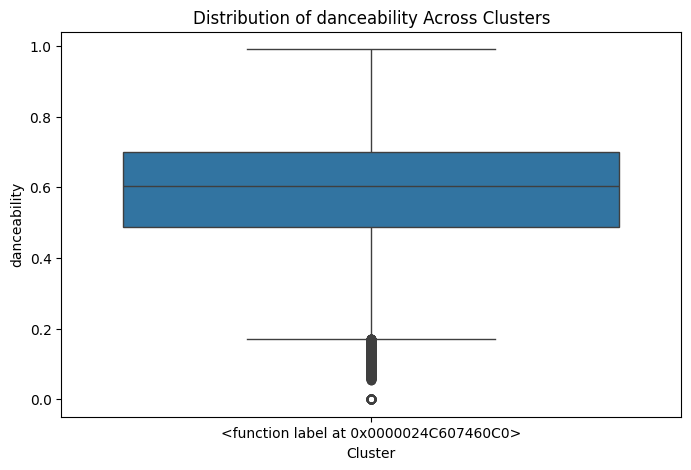

In [36]:
import seaborn as sns

feature = "danceability"

plt.figure(figsize=(8,5))
sns.boxplot(x=df_clusters["cluster"], y=df_clusters[feature])
plt.title(f"Distribution of {feature} Across Clusters")
plt.xlabel("Cluster")
plt.ylabel(feature)
plt.show()

In [ ]:
df_final = df_clusters.copy()
df_final.to_csv("final_clustered_music_dataset.csv", index=False)

print("CSV exported successfully!")

CSV exported successfully!
